In [1]:
import numpy as np
import json 
import torch
from matplotlib import pyplot as plt
from pathlib import Path

%matplotlib inline 

In [2]:
from graph_bridges import results_path
results_path = Path(results_path)
loss_study_path = results_path / "graph" / "lobster" / "contant_past_model_loss.json"

In [3]:
loss = json.load(open(loss_study_path,"r"))

In [11]:
constant_time_mean = {}
constant_time_std = {}

for contant_rate,loss_per_times in loss.items():
    print(contant_rate)
    times_ = []
    loss_average = []
    loss_std = []
    for timestep,losses_list in loss_per_times.items():
        times_.append(timestep)
        loss_average.append(np.asarray(losses_list).mean())
        loss_std.append(np.asarray(losses_list).std())
    loss_average = np.asarray(loss_average)
    loss_std = np.asarray(loss_std)
    loss_average = loss_average/max(loss_average)
    loss_std = loss_std/max(loss_std)
    constant_time_mean[contant_rate] = (times_,loss_average,loss_std)

0.1
1.0
10.0
100.0


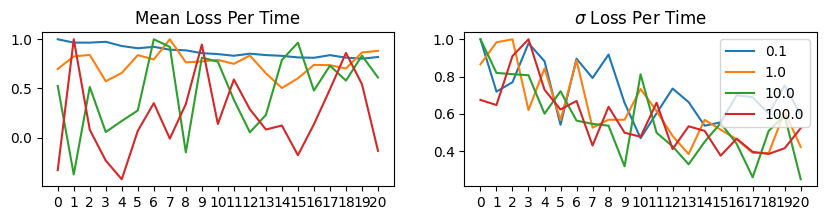

In [13]:
fig, axs = plt.subplots(ncols=2,nrows=1,figsize=(10,2))
for constant,time_value in constant_time_mean.items():
    axs[0].plot(time_value[0],time_value[1],label=str(constant))
    axs[1].plot(time_value[0],time_value[2],label=str(constant))
axs[0].set_title("Mean Loss Per Time")
axs[1].set_title(r"$\sigma$ Loss Per Time")
plt.legend(loc="best")
plt.savefig("loss_for_constant_forward_rate.png")